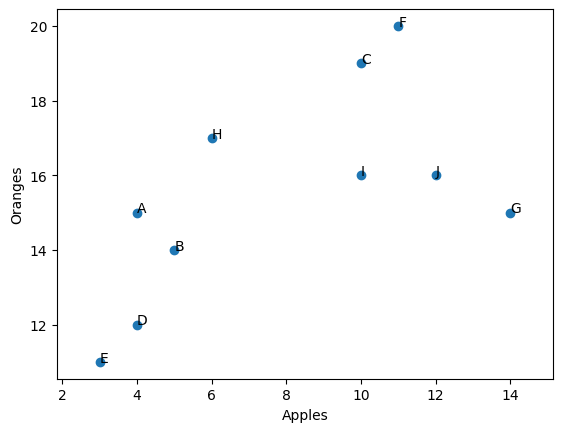

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.spatial import distance_matrix

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']
data = list(zip(x, y))

plt.scatter(x, y)
plt.xlim([0,16])
plt.ylim([8,22])
plt.axis('equal')
plt.xlabel('Apples')
plt.ylabel('Oranges')
for i in range(10):
    plt.annotate(store[i],[x[i],y[i]])
plt.show()


In [ ]:
distance_matrix(data,data).round(2)

# Hierarchical Clustering

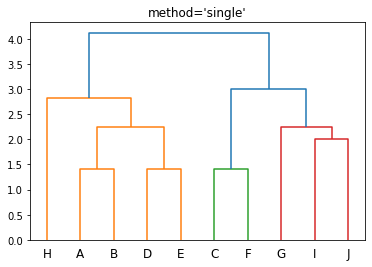

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance_matrix
import pandas as pd

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']

df = pd.DataFrame() 
df['Store'] = store
df['Apples'] = x
df['Oranges'] = y
data = df[['Apples','Oranges']]

linkage_data = linkage(data, method='single', metric='euclidean')
dendrogram(linkage_data,labels=df['Store'].to_list())

plt.title("method='single'")
plt.show()

In [5]:
cluster_id = fcluster(linkage_data, t=2.5, criterion='distance')

In [6]:
cluster_id

array([1, 1, 3, 1, 1, 3, 4, 2, 4, 4], dtype=int32)

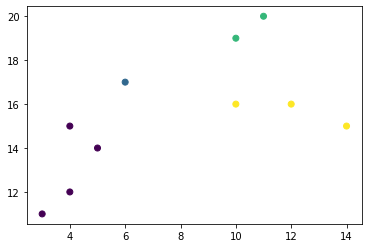

In [5]:
plt.scatter(df['Apples'],df['Oranges'], c=cluster_id)
plt.show()

In [ ]:
linkage_data = linkage(data, method='average', metric='euclidean')
dendrogram(linkage_data,labels=['A','B','C','D','E','F','G','H','I','J'])
plt.title("method='average'")
plt.show()

In [ ]:
linkage_data = linkage(data, method='complete', metric='euclidean')
dendrogram(linkage_data,labels=['A','B','C','D','E','F','G','H','I','J'])
plt.title("method='complete'")
plt.show()

In [ ]:
linkage_data = linkage(data, method='centroid', metric='euclidean')
dendrogram(linkage_data,labels=['A','B','C','D','E','F','G','H','I','J'])
plt.title("method='centroid'")
plt.show()

In [ ]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data,labels=['A','B','C','D','E','F','G','H','I','J'])
plt.title("method='ward'")
plt.show()

# K-Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import pandas as pd

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']

df = pd.DataFrame() 
df['Store'] = store
df['Apples'] = x
df['Oranges'] = y
data = df[['Apples','Oranges']]

model_kmeans = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
model_kmeans.fit(data)

df['cluster_id'] = model_kmeans.labels_

centroids = model_kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Apples'],df['Oranges'], c=df['cluster_id'])
plt.scatter(centroids[:,0],centroids[:,1],marker='X', c='r')
plt.show()

# Application : Image Segmentation using Clustering

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn import cluster
import numpy as np  

im = Image.open("img-bird.jpg")
#display(im)

In [ ]:
data = asarray(im)
imshape = data.shape
plt.imshow(data)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c = X/255.0, marker='.')
plt.show()

In [ ]:
#K-Means
k = 5
model_kmeans = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
model_kmeans.fit(X)
cluster_id = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_
print(centroids)

In [ ]:
Xnew = X.copy()
for i in range(k):
    Xnew[cluster_id==i,:] = centroids[i,:]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c = Xnew/255.0, marker='.')
plt.show()

In [ ]:
Xnew = Xnew.reshape(imshape)
plt.imshow(Xnew)

# Application on Data

https://archive.ics.uci.edu/ml/datasets/HCV+data

https://plotly.com/python/radar-chart/



In [ ]:
import pandas as pd 
from sklearn import cluster
from sklearn import preprocessing

df_org = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')

df = df_org[['Age', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

df = df.dropna()
df = (df - df.mean()) / (df.max() - df.min())


In [ ]:
k=3
model_kmeans = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
model_kmeans.fit(df)

In [ ]:
import plotly.graph_objects as go

features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

fig = go.Figure()
for i in range(k):
    fig.add_trace(go.Scatterpolar(r= model_kmeans.cluster_centers_[i,:], 
          theta=features, name='Cluster'+str(i) ))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

In [ ]:
#https://plotly.com/python/subplots/
from plotly.subplots import make_subplots
import plotly.graph_objects as go

features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT']

fig = make_subplots( rows=1, cols=3, subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2") )

fig.add_trace(go.Bar(x=features, y=model_kmeans.cluster_centers_[0,:], ), 1,1)
fig.add_trace(go.Bar(x=features, y=model_kmeans.cluster_centers_[1,:], ), 1,2)
fig.add_trace(go.Bar(x=features, y=model_kmeans.cluster_centers_[2,:], ), 1,3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()
